<a href="https://colab.research.google.com/github/Mayankk88/Machine-Learning/blob/main/machine_learning_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# supervised learning


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/titanic2.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.0,5.000000
mean,3.000000,0.600000,2.200000,31.20000,0.600000,0.0,29.521660
std,1.581139,0.547723,1.095445,6.83374,0.547723,0.0,30.510029
min,1.000000,0.000000,1.000000,22.00000,0.000000,0.0,7.250000
25%,2.000000,0.000000,1.000000,26.00000,0.000000,0.0,7.925000
50%,3.000000,1.000000,3.000000,35.00000,1.000000,0.0,8.050000
75%,4.000000,1.000000,3.000000,35.00000,1.000000,0.0,53.100000
max,5.000000,1.000000,3.000000,38.00000,1.000000,0.0,71.283300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  5 non-null      int64  
 1   Survived     5 non-null      int64  
 2   Pclass       5 non-null      int64  
 3   Name         5 non-null      object 
 4   Sex          5 non-null      object 
 5   Age          5 non-null      int64  
 6   SibSp        5 non-null      int64  
 7   Parch        5 non-null      int64  
 8   Ticket       5 non-null      object 
 9   Fare         5 non-null      float64
 10  Cabin        2 non-null      object 
 11  Embarked     5 non-null      object 
dtypes: float64(1), int64(6), object(5)
memory usage: 612.0+ bytes


In [ ]:
df['Travelalone'] = np.where((df["SibSp"] + df["Parch"]) > 0, 0, 1).astype('uint8')


In [ ]:
df1=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
df1.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
Travelalone,0


In [ ]:
df['Age'].fillna(df1['Age'].median(skipna=True),inplace=True)
df1.head()

<ipython-input-15-3664642903>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df1['Age'].median(skipna=True),inplace=True)


,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,3,male,22,7.2500,S,0
1,1,1,female,38,71.2833,C,0
2,1,3,female,26,7.9250,S,1
3,1,1,female,35,53.1000,S,0
4,0,3,male,35,8.0500,S,1


In [ ]:
df_titanic = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)
df_titanic.head()


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Travelalone,Pclass_3,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,0,True,True,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,0,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,1,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,0,False,True,False
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,1,True,True,True


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X is your DataFrame with the features you want to scale
X = df_titanic.drop(['Survived'], axis=1)  # Drop target variable, if you haven't already
x_numeric = X.select_dtypes(include=['int64', 'float64'])  # Select numeric columns

# Initialize StandardScaler
trans_ss = StandardScaler()

# Fit and transform the numeric data
df_ss = trans_ss.fit_transform(x_numeric)

# Convert the result back into a DataFrame with the original numeric column names
df_ss = pd.DataFrame(df_ss, columns=x_numeric.columns)

# Display the first few rows
df_ss.head()


,PassengerId,Age,SibSp,Parch,Fare
0,-1.414214,-1.505166,0.816497,0.0,-0.816141
1,-0.707107,1.112514,0.816497,0.0,1.530347
2,0.000000,-0.850746,-1.224745,0.0,-0.791405
3,0.707107,0.621699,0.816497,0.0,0.864024
4,1.414214,0.621699,-1.224745,0.0,-0.786825


# overfitting


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
x, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize lists to hold training and test accuracies
train_scores, test_scores = list(), list()

# Range of tree depths (1 to 20)
value = [i for i in range(1, 21)]

# Loop over different max_depth values
for i in value:
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on training and test sets
    train_yhat = model.predict(X_train)
    test_yhat = model.predict(X_test)

    # Compute accuracy for training and test sets
    train_acc = accuracy_score(y_train, train_yhat)
    test_acc = accuracy_score(y_test, test_yhat)

    # Append accuracies to the lists
    train_scores.append(train_acc)
    test_scores.append(test_acc)

    # Print accuracies for this max_depth
    print(f'{i}, train: {train_acc:.3f}, test: {test_acc:.3f}')


1, train: 0.835, test: 0.838
2, train: 0.850, test: 0.853
3, train: 0.872, test: 0.867
4, train: 0.899, test: 0.887
5, train: 0.905, test: 0.891
6, train: 0.929, test: 0.912
7, train: 0.950, test: 0.929
8, train: 0.957, test: 0.931
9, train: 0.968, test: 0.930
10, train: 0.975, test: 0.934
11, train: 0.979, test: 0.934
12, train: 0.985, test: 0.935
13, train: 0.987, test: 0.940
14, train: 0.990, test: 0.937
15, train: 0.993, test: 0.939
16, train: 0.995, test: 0.939
17, train: 0.996, test: 0.939
18, train: 0.998, test: 0.937
19, train: 0.998, test: 0.939
20, train: 0.999, test: 0.940


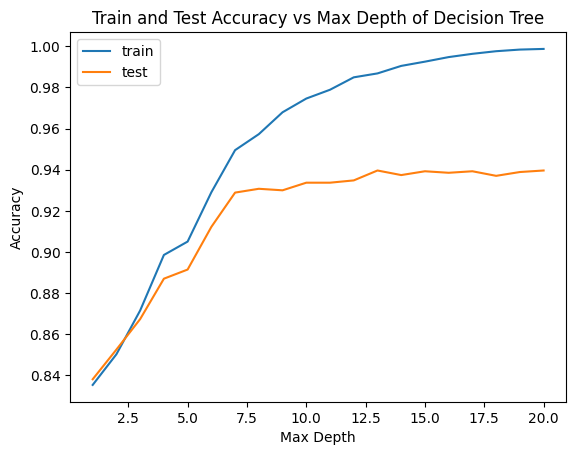

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and testing accuracy
plt.plot(value, train_scores, label='train')
plt.plot(value, test_scores, label='test')

# Adding labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Max Depth of Decision Tree')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Corrected 'grid' to 'gini' which is a valid criterion
    'max_depth': [2, 4, 6, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 100]
}

# Initialize the GridSearchCV with DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring="accuracy")

# Fit the model on the training data
clf.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = clf.best_estimator_

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Evaluate the accuracy on the training set
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Output the best estimator and accuracies
print(f"Best Estimator: {best_model}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")


Best Estimator: DecisionTreeClassifier(max_depth=10)
Test Accuracy: 0.9367
Train Accuracy: 0.9748
